# Data science with Python

Here, we will work with a so called proteomics data set from breast cancer research.

In Python, there is a module called Pandas which can be used to analyze large datasets.

## Load a dataset

In [1]:
# import the pandas module and name it "pd"
import pandas as pd

# download the proteomics dataset
# url = "https://raw.githubusercontent.com/researchschool/datalab/master/breast_cancer_study.txt"

data = pd.read_csv('breast_cancer_study.txt', delimiter="\t")

In [2]:
# have a first look at the data
data.head()

,protein,description,OSL.53E,OSL.567,OSL.3FF,OSL.55F,OSL.46A,OSL.4B0,OSL.4D6,OSL.485,...,OSL.42E,OSL.40A,OSL.40E,OSL.3FA,OSL.521,OSL.46D,OSL.54D,OSL.4BA,OSL.579,OSL.57B
0,A1BG,alpha-1-B glycoprotein [Source:HGNC Symbol;Acc:5],0.955203,1.482560,0.874432,0.690526,0.604010,0.759595,1.565525,0.917325,...,1.199350,0.663848,0.922389,0.986266,0.810922,1.017006,0.649041,1.049616,1.016278,1.672558
1,A2M,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:7],1.437584,1.630197,0.708253,0.828533,0.519360,0.884804,1.292919,0.739292,...,1.382015,0.593546,1.241465,0.643869,0.706473,1.401225,0.536463,1.309191,0.987173,2.854213
2,A2ML1,alpha-2-macroglobulin-like 1 [Source:HGNC Symb...,2.196881,0.267059,0.461732,0.587545,0.695557,0.268611,4.557158,0.244910,...,0.110256,0.081223,0.069266,0.069013,0.064678,0.062551,0.060645,0.085740,0.107721,0.080793
3,AAAS,achalasia. adrenocortical insufficiency. alacr...,1.122990,0.868185,1.027464,1.159335,1.436344,1.037696,0.876019,1.000512,...,1.009949,1.089883,0.940090,1.004389,0.927937,0.920587,0.940156,0.952425,0.999443,0.886209
4,AACS,acetoacetyl-CoA synthetase [Source:HGNC Symbol...,1.407372,0.646210,1.280341,0.492152,1.076007,0.912358,0.719840,0.818817,...,1.450737,0.555635,0.827086,0.971027,2.493064,0.737344,1.030457,1.129944,1.127882,0.701034


What do the columns, rows and values mean?

How big is the dataset?

In [3]:
data.shape

(9995, 47)

`data` is an object. That means, we can call properties like `data.shape` or call functions (methods) such as `data.head()`.

## Tidying up the dataset

In [4]:
# get rid of string values in the dataset

# remove the descriptions
data_no_desc = data.drop(columns="description")
data_no_desc.head()

,protein,OSL.53E,OSL.567,OSL.3FF,OSL.55F,OSL.46A,OSL.4B0,OSL.4D6,OSL.485,OSL.41B,...,OSL.42E,OSL.40A,OSL.40E,OSL.3FA,OSL.521,OSL.46D,OSL.54D,OSL.4BA,OSL.579,OSL.57B
0,A1BG,0.955203,1.482560,0.874432,0.690526,0.604010,0.759595,1.565525,0.917325,0.827778,...,1.199350,0.663848,0.922389,0.986266,0.810922,1.017006,0.649041,1.049616,1.016278,1.672558
1,A2M,1.437584,1.630197,0.708253,0.828533,0.519360,0.884804,1.292919,0.739292,0.616740,...,1.382015,0.593546,1.241465,0.643869,0.706473,1.401225,0.536463,1.309191,0.987173,2.854213
2,A2ML1,2.196881,0.267059,0.461732,0.587545,0.695557,0.268611,4.557158,0.244910,0.435799,...,0.110256,0.081223,0.069266,0.069013,0.064678,0.062551,0.060645,0.085740,0.107721,0.080793
3,AAAS,1.122990,0.868185,1.027464,1.159335,1.436344,1.037696,0.876019,1.000512,1.122245,...,1.009949,1.089883,0.940090,1.004389,0.927937,0.920587,0.940156,0.952425,0.999443,0.886209
4,AACS,1.407372,0.646210,1.280341,0.492152,1.076007,0.912358,0.719840,0.818817,0.644396,...,1.450737,0.555635,0.827086,0.971027,2.493064,0.737344,1.030457,1.129944,1.127882,0.701034


In [5]:
# assign the protein name as row name
data_no_desc.index = data_no_desc["protein"]

# show the new row names
data_no_desc.index

# delete the protein column
data_no_desc_prot = data_no_desc.drop(columns="protein")

data_no_desc_prot.head()

,OSL.53E,OSL.567,OSL.3FF,OSL.55F,OSL.46A,OSL.4B0,OSL.4D6,OSL.485,OSL.41B,OSL.4AF,...,OSL.42E,OSL.40A,OSL.40E,OSL.3FA,OSL.521,OSL.46D,OSL.54D,OSL.4BA,OSL.579,OSL.57B
protein,,,,,,,,,,,,,,,,,,,,,
A1BG,0.955203,1.482560,0.874432,0.690526,0.604010,0.759595,1.565525,0.917325,0.827778,0.877537,...,1.199350,0.663848,0.922389,0.986266,0.810922,1.017006,0.649041,1.049616,1.016278,1.672558
A2M,1.437584,1.630197,0.708253,0.828533,0.519360,0.884804,1.292919,0.739292,0.616740,0.771954,...,1.382015,0.593546,1.241465,0.643869,0.706473,1.401225,0.536463,1.309191,0.987173,2.854213
A2ML1,2.196881,0.267059,0.461732,0.587545,0.695557,0.268611,4.557158,0.244910,0.435799,0.083543,...,0.110256,0.081223,0.069266,0.069013,0.064678,0.062551,0.060645,0.085740,0.107721,0.080793
AAAS,1.122990,0.868185,1.027464,1.159335,1.436344,1.037696,0.876019,1.000512,1.122245,0.749676,...,1.009949,1.089883,0.940090,1.004389,0.927937,0.920587,0.940156,0.952425,0.999443,0.886209
AACS,1.407372,0.646210,1.280341,0.492152,1.076007,0.912358,0.719840,0.818817,0.644396,1.546707,...,1.450737,0.555635,0.827086,0.971027,2.493064,0.737344,1.030457,1.129944,1.127882,0.701034


Now we take the log2 of all the values.

In [6]:
# import numpy to get a lot of math functions
import numpy as np

# take the log2 of all the numbers in our data matrix
data_log = np.log2(data_no_desc_prot)

data_log.head()

,OSL.53E,OSL.567,OSL.3FF,OSL.55F,OSL.46A,OSL.4B0,OSL.4D6,OSL.485,OSL.41B,OSL.4AF,...,OSL.42E,OSL.40A,OSL.40E,OSL.3FA,OSL.521,OSL.46D,OSL.54D,OSL.4BA,OSL.579,OSL.57B
protein,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.066121,0.568091,-0.193582,-0.534232,-0.727356,-0.396698,0.646646,-0.124495,-0.272684,-0.188469,...,0.262253,-0.591075,-0.116552,-0.019952,-0.302366,0.024328,-0.623619,0.069861,0.023295,0.742057
A2M,0.523647,0.705046,-0.497663,-0.271369,-0.945193,-0.176570,0.370632,-0.435785,-0.697266,-0.373412,...,0.466774,-0.752569,0.312044,-0.635160,-0.501293,0.486689,-0.898448,0.388675,-0.018626,1.513093
A2ML1,1.135457,-1.904769,-1.114871,-0.767230,-0.523759,-1.896407,2.188134,-2.029679,-1.198264,-3.581341,...,-3.181075,-3.621971,-3.851717,-3.856993,-3.950572,-3.998832,-4.043457,-3.543882,-3.214626,-3.629631
AAAS,0.167345,-0.203926,0.039088,0.213297,0.522402,0.053383,-0.190965,0.000738,0.166388,-0.415661,...,0.014282,0.124173,-0.089128,0.006318,-0.107901,-0.119374,-0.089028,-0.070323,-0.000804,-0.174281
AACS,0.493004,-0.629925,0.356529,-1.022825,0.105688,-0.132327,-0.474253,-0.288387,-0.633981,0.629200,...,0.536786,-0.847792,-0.273891,-0.042417,1.317920,-0.439591,0.043285,0.176251,0.173616,-0.512444


## Inspecting the data

In [7]:
# show the expression profile of one protein
data_log.loc[["TP53"]].T.iloc[1:].plot()

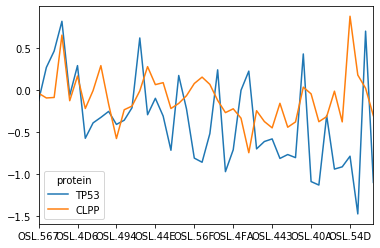

In [8]:
# show multiple proteins
data_log.loc[["TP53", "CLPP"]].T.iloc[1:].plot()

## Find protein complexes in breast cancer

Proteins usually do not act on their own. They form complexes with themselves or other proteins. We can find such multi-protein complexes by comparing their expression profile with each other. Complexed proteins often are coregulated meaning that their expression profile across all the tumors looks similarily.

In [9]:
# calculate a correlation matrix (What is that by the way?)
corr_matrix = data_log.T.corr()

# show the head of the correlation matrix
corr_matrix.head()

protein,A1BG,A2M,A2ML1,AAAS,AACS,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,TEAD4,RNF138,B4GALT2,NTRK2,THAP11,TMEM38A,TMEM106A,NUDT11,COQ2,CALML4
protein,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.826536,0.157983,-0.499862,0.115681,0.526118,-0.274392,-0.221061,-0.078157,-0.145995,...,-0.189203,-0.421569,0.498897,0.396729,-0.502330,0.064307,0.222590,0.098984,-0.355513,0.303707
A2M,0.826536,1.000000,0.169855,-0.327825,0.073473,0.497986,-0.445293,-0.208976,-0.194411,-0.260143,...,0.015011,-0.212969,0.473892,0.329017,-0.341112,0.185983,0.316741,0.159450,-0.171766,0.292652
A2ML1,0.157983,0.169855,1.000000,0.252616,-0.108658,0.294351,-0.239614,-0.117948,-0.455260,-0.031381,...,0.278521,-0.030281,0.262095,0.040700,0.094925,0.267291,0.567296,-0.140957,0.183010,0.144931
AAAS,-0.499862,-0.327825,0.252616,1.000000,-0.086886,-0.112723,-0.055404,-0.092912,-0.095786,-0.161712,...,0.369941,0.454078,0.010258,-0.193770,0.488254,0.240533,0.154282,-0.168755,0.353043,-0.098056
AACS,0.115681,0.073473,-0.108658,-0.086886,1.000000,0.098762,0.148402,-0.353289,0.311541,0.318223,...,-0.216856,-0.227069,0.048009,0.235666,-0.189244,0.007620,-0.217716,-0.182238,0.124602,-0.097908


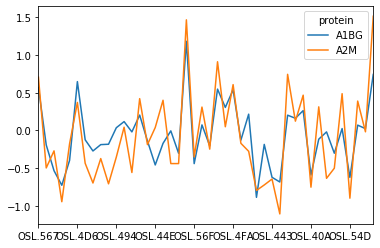

In [10]:
# check if the correlation matrix is correct

# a good correlation (0.83)
data_log.loc[["A1BG", "A2M"]].T.iloc[1:].plot()

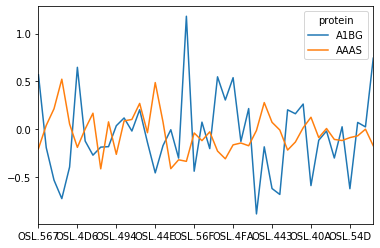

In [11]:
# a bad correlation
data_log.loc[["A1BG", "AAAS"]].T.iloc[1:].plot()

### Visualise the correlation matrix

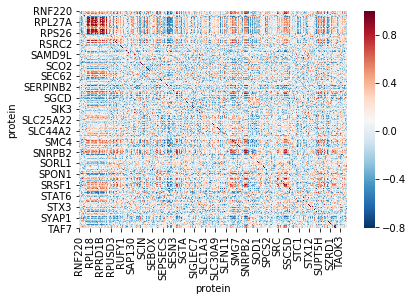

In [12]:
import seaborn as sns

sns.heatmap(corr_matrix.iloc[6000:7000, 6000:7000], cmap="RdBu_r")

We cannot really see what is going on... Let's structure the data with some machine learning.

### Data clustering

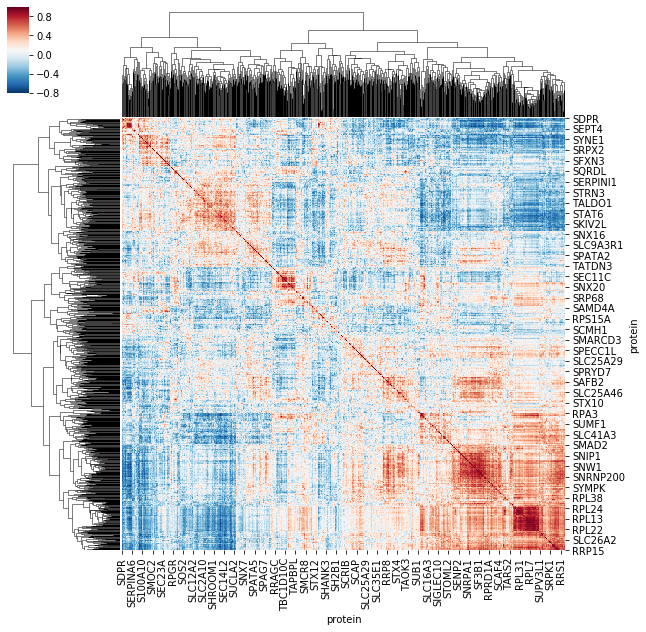

In [13]:
sns.clustermap(corr_matrix.iloc[6000:7000, 6000:7000], cmap="RdBu_r")

Let's focus on two ribosomal proteins and plot their profiles.

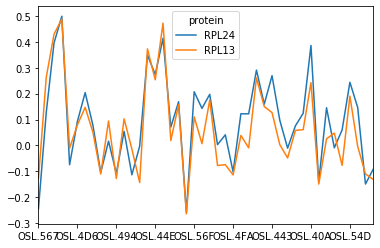

In [14]:
data_log.loc[["RPL24", "RPL13"]].T.iloc[1:].plot()

## Identify different tumor groups

Breast cancer comes in different subgriups that can be treated with different medications and therapy plans. Here, we try to identify these subgroups.

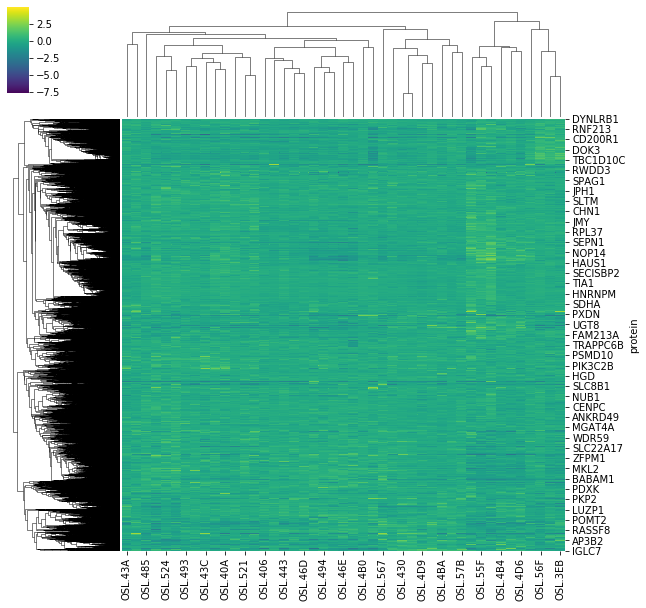

In [15]:
# cluster the tumors
sns.clustermap(data_log, metric="correlation", cmap="viridis")
